In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('C:/Users/krish/OneDrive/Desktop/sales_analyzer/Superstore Sales.csv', 
                 encoding='latin1',parse_dates=['Order Date', 'Ship Date']) 

In [4]:
df.head(5)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.71,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                8399 non-null   int64         
 1   Order ID              8399 non-null   int64         
 2   Order Date            8399 non-null   datetime64[ns]
 3   Order Priority        8399 non-null   object        
 4   Order Quantity        8399 non-null   int64         
 5   Sales                 8399 non-null   float64       
 6   Discount              8399 non-null   float64       
 7   Ship Mode             8399 non-null   object        
 8   Profit                8399 non-null   float64       
 9   Unit Price            8399 non-null   float64       
 10  Shipping Cost         8399 non-null   float64       
 11  Customer Name         8399 non-null   object        
 12  Province              8399 non-null   object        
 13  Region            

In [6]:
print(f"Loaded dataset: {df.shape} rows, columns")

Loaded dataset: (8399, 21) rows, columns


In [7]:
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 Row ID                   0
Order ID                 0
Order Date               0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
Province                 0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Name             0
Product Container        0
Product Base Margin     63
Ship Date                0
dtype: int64


In [8]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [9]:
print("Post-imputation missing values:\n", df[numeric_cols].isnull().sum())

Post-imputation missing values:
 Row ID                 0
Order ID               0
Order Quantity         0
Sales                  0
Discount               0
Profit                 0
Unit Price             0
Shipping Cost          0
Product Base Margin    0
dtype: int64


In [10]:
df.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1.0,3.0,2010-10-13,Low,6.0,261.5400,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49.0,293.0,2012-10-01,High,49.0,10123.0200,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50.0,293.0,2012-10-01,High,27.0,244.5700,0.01,Regular Air,46.71,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80.0,483.0,2011-07-10,High,30.0,4965.7595,0.08,Regular Air,1198.97,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85.0,515.0,2010-08-28,Not Specified,19.0,394.2700,0.08,Regular Air,30.94,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30


In [11]:
total_sales = np.sum(df['Sales'])
avg_sales = np.mean(df['Sales'])
total_profit = np.sum(df['Profit'])
profit_margin = (total_profit / total_sales) * 100 if total_sales else 0

In [12]:
print("Total Sales: ",total_sales)

Total Sales:  14915600.824000001


In [13]:
print(f"Average Sale: ${avg_sales:,.2f}")

Average Sale: $1,775.88


In [14]:
print(f"Total Profit: ${total_profit:,.2f}")

Total Profit: $1,521,767.98


In [15]:
print(f"Average Profit Margin: {profit_margin:.2f}%")

Average Profit Margin: 10.20%


In [16]:
region_stats = df.groupby('Region')[['Sales', 'Profit']].agg(['sum', 'mean', 'count'])
print("\nSales & Profit by Region:\n", region_stats.round(2))


Sales & Profit by Region:
                             Sales                    Profit              
                              sum     mean count        sum    mean count
Region                                                                   
Atlantic               2014248.20  1865.04  1080  238960.66  221.26  1080
Northwest Territories   800847.33  2032.61   394  100653.08  255.46   394
Nunavut                 116376.48  1473.12    79    2841.11   35.96    79
Ontario                3063212.48  1677.55  1826  346868.54  189.96  1826
Prarie                 2837304.60  1663.13  1706  321160.12  188.25  1706
Quebec                 1510195.08  1933.67   781  140426.65  179.80   781
West                   3597549.28  1806.91  1991  297008.61  149.18  1991
Yukon                   975867.37  1800.49   542   73849.21  136.25   542


In [18]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [19]:
monthly_sales = df.set_index('Order Date')['Sales'].resample('M').sum()

C:\Users\krish\AppData\Local\Temp\ipykernel_15568\3974093261.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Order Date')['Sales'].resample('M').sum()


In [20]:
monthly_sales = df.set_index('Order Date')['Sales'].resample('ME').sum()

In [21]:

print(monthly_sales)


Order Date
2009-01-31    516302.9595
2009-02-28    332480.6365
2009-03-31    411628.7290
2009-04-30    393276.4820
2009-05-31    230145.5380
2009-06-30    263456.0680
2009-07-31    380503.9700
2009-08-31    329754.7150
2009-09-30    325292.3145
2009-10-31    361555.2665
2009-11-30    248933.4260
2009-12-31    415809.3505
2010-01-31    336526.6805
2010-02-28    271580.5080
2010-03-31    217808.0065
2010-04-30    266968.5890
2010-05-31    283534.2850
2010-06-30    293080.6650
2010-07-31    229885.4985
2010-08-31    207937.0090
2010-09-30    418343.2785
2010-10-31    365251.9850
2010-11-30    290670.3455
2010-12-31    368093.9540
2011-01-31    251467.2280
2011-02-28    299890.1410
2011-03-31    296035.8710
2011-04-30    288213.3970
2011-05-31    262628.4960
2011-06-30    197740.8455
2011-07-31    287905.1865
2011-08-31    274578.4795
2011-09-30    276049.7960
2011-10-31    305660.4510
2011-11-30    367769.4960
2011-12-31    328877.3145
2012-01-31    340626.5070
2012-02-29    276132.4990
2

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

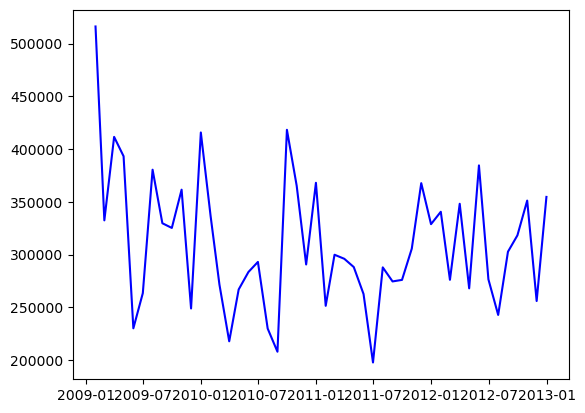

In [23]:
plt.plot(monthly_sales.index, monthly_sales.values, 'b-', label='Monthly Sales')

Text(0.5, 1.0, 'Monthly Sales Trends')

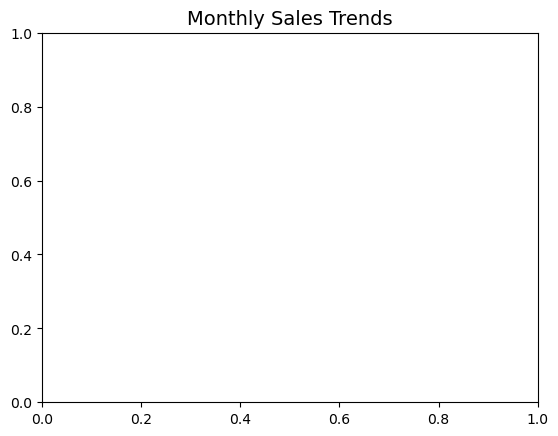

In [24]:
plt.title('Monthly Sales Trends', fontsize=14)

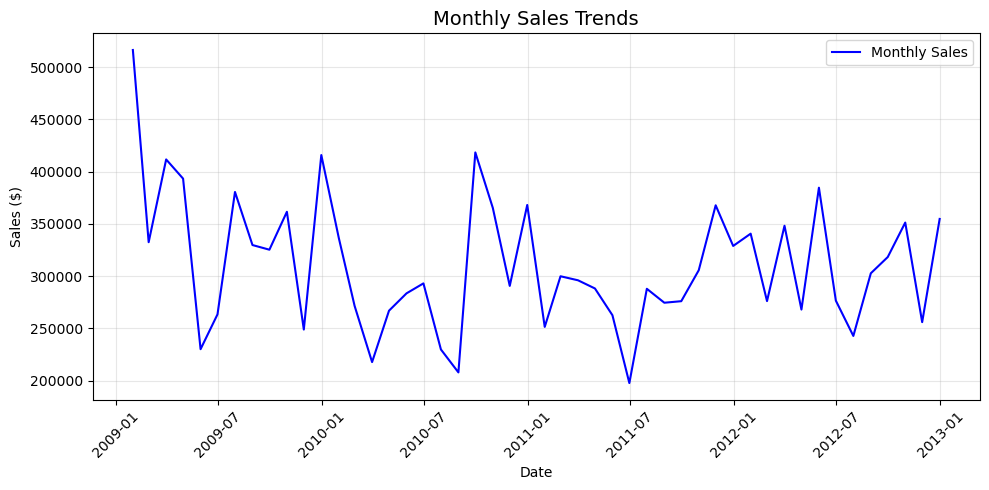

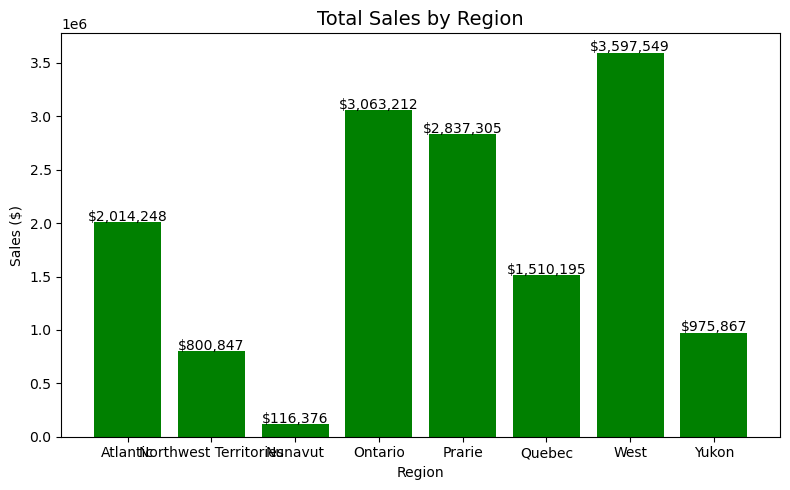

In [26]:

df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.set_index('Order Date')['Sales'].resample('ME').sum()
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, 'b-', label='Monthly Sales')
plt.title('Monthly Sales Trends', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('monthly_sales_trend.png')
plt.show()

region_sales = df.groupby('Region')['Sales'].sum()
plt.figure(figsize=(8, 5))
plt.bar(region_sales.index, region_sales.values, color='g')
plt.title('Total Sales by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Sales ($)')
for i, v in enumerate(region_sales.values):
    plt.text(i, v + 10000, f'${v:,.0f}', ha='center')
plt.tight_layout()
plt.savefig('sales_by_region.png')
plt.show()

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')  

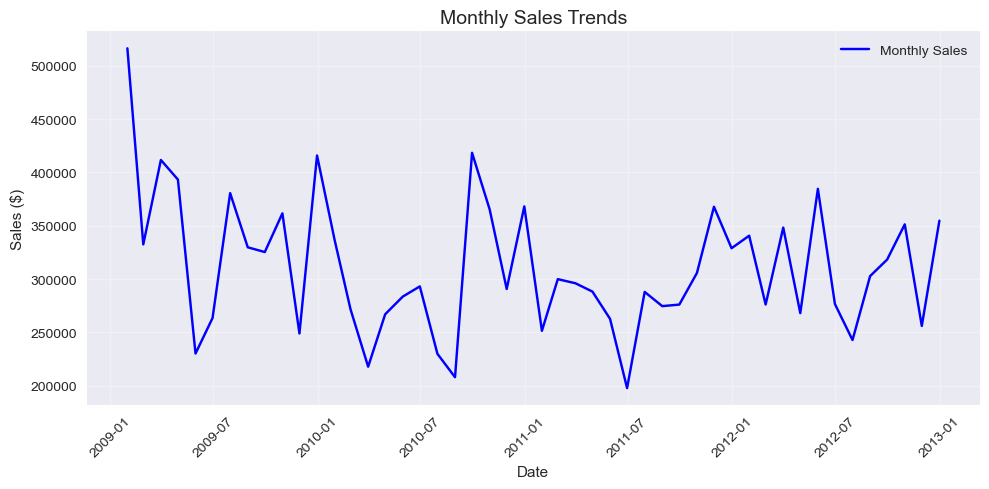

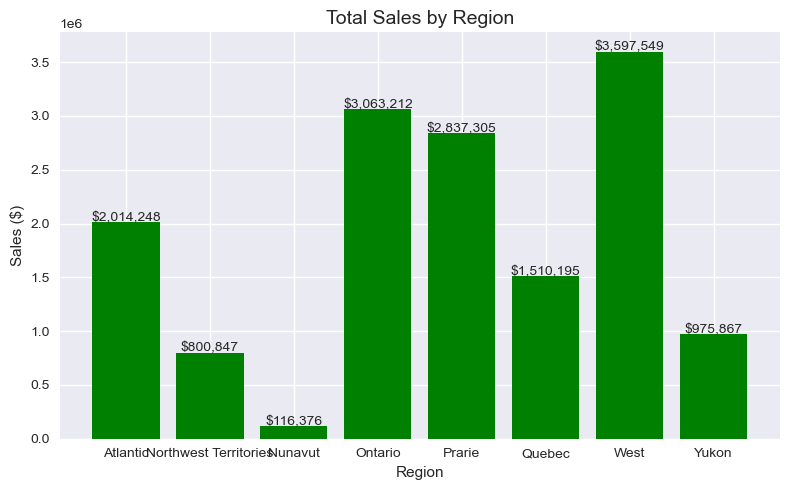

In [29]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.set_index('Order Date')['Sales'].resample('ME').sum()
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, 'b-', label='Monthly Sales')
plt.title('Monthly Sales Trends', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('monthly_sales_trend.png')
plt.show()

region_sales = df.groupby('Region')['Sales'].sum()
plt.figure(figsize=(8, 5))
plt.bar(region_sales.index, region_sales.values, color='g')
plt.title('Total Sales by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Sales ($)')
for i, v in enumerate(region_sales.values):
    plt.text(i, v + 10000, f'${v:,.0f}', ha='center')
plt.tight_layout()
plt.savefig('sales_by_region.png')
plt.show()